In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Telco Customer Churn
### Focused customer retention programs

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

----

<img src="https://cdn-images-1.medium.com/fit/t/1600/480/0*d58iZ6esNNcfntQ7">

----

### Context

"Predict behavior to retain customers. Our goal is to analyze all relevant customer data and develop focused customer retention programs." 

### Content

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po

### Loading Data

In [3]:
customer_churn = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Overview

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print('The names of columns in our dataset:\n ',list(customer_churn.columns))
print("\nThe total number of columns in our data set: ",len(customer_churn.columns))
print("\nThe shape of our data set is: ",customer_churn.shape)

The names of columns in our dataset:
  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

The total number of columns in our data set:  21

The shape of our data set is:  (7043, 21)


Now, let's check if we have any missing values in our dataset

In [6]:
print('-------------------------------')
print("Rows\t\tMissing values")
print("-------------------------------")
print(customer_churn.isna().sum())
print('------------------------------')

-------------------------------
Rows		Missing values
-------------------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
------------------------------


Here we have no missing values.

Time to check what type of data we have.

In [7]:
print('----------------------------')
print("Rows\t\tData types")
print('----------------------------')
print(customer_churn.dtypes)
print('----------------------------')

----------------------------
Rows		Data types
----------------------------
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
----------------------------


Here we can see that we have lots of items having data types object. 

## Exploratory Data Analysis

Now, let's go through the churn column in our dataset.

In [8]:
customer_churn['Churn'][:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

Here we can say that churn have have positive or negative values . Yes means customer will churn our and no means customer will not churn our. So, our first task is to convert the yes/no values to 1/0 values so that is will be easier for us to do the further operations.

In [9]:
customer_churn['Churn'] = customer_churn['Churn'].replace({"Yes":1,"No":0})

In [10]:
customer_churn['Churn'][:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Here we get the value in the form of 0 and 1. Let's step ahead and look at other rows if we can convert the values to the appropriate format.

let's convert replace the "No internet service" string to "No" in the following columns below.

In [11]:
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for values in cols:
    customer_churn[values] = customer_churn[values].replace({'No internet service':'No'})

Now the values lies in yes or no for the above columns.

Total charges column have some values with extra spaces. so first remove those extra spaces from our columns. After that our column is a type of object so convert it into float.

In [12]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
customer_churn = customer_churn[customer_churn["TotalCharges"].notnull()]
customer_churn = customer_churn.reset_index()[customer_churn.columns]

customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [13]:
customer_churn['TotalCharges'].dtype

dtype('float64')

Here we successfully converted our object type data into float.

### Data Visualization

Let's visualize our data and understand it more clearly.


In [14]:
customer_churn['Churn'].value_counts().unique()

array([5163, 1869])

### What percent of customer have churn or not?

In [15]:
churn_x = customer_churn['Churn'].value_counts().keys().tolist()
churn_y = customer_churn['Churn'].value_counts().values.tolist()
fig = px.pie(customer_churn,
           labels = churn_x,
            values = churn_y,
            color_discrete_sequence=['grey','teal'],
             hole=0.6
            )


fig.update_layout(
    title='Customer Churn',
    template='plotly_dark'
)
fig.show()

### "Male or Female" who have churn the most?

In [16]:
gender_chunk = customer_churn.groupby('gender').Churn.mean().reset_index()

fig = go.Figure(data=[go.Bar(
            x=gender_chunk['gender'], y=gender_chunk['Churn'],
            textposition='auto',
            width=[0.2,0.2],
            marker = dict(color=['brown','purple']))])
fig.update_layout(
    title='Churn rate by Gender',
    xaxis_title="Gender",
    yaxis_title="Churn rate",
        template='plotly_dark'

)
fig.show()

### Does Tech support plays a important role?

In [17]:
tech_chunk = customer_churn.groupby('TechSupport').Churn.mean().reset_index()

fig = go.Figure(data=[go.Bar(
            x=tech_chunk['TechSupport'], y=tech_chunk['Churn'],
            textposition='auto',
            width=[0.2,0.2],
            marker = dict(color=['midnightblue','darkgreen']))])
fig.update_layout(
    title='Churn rate by Tech Support',
    xaxis_title="Tech Support",
    yaxis_title="Churn rate",
        template='plotly_dark'

)
fig.show()

### Telecome company is not satisfying their customer with internet support?

In [18]:
internet_chunk = customer_churn.groupby('InternetService').Churn.mean().reset_index()

fig = go.Figure(data=[go.Bar(
            x=internet_chunk['InternetService'], y=internet_chunk['Churn'],
            textposition='auto',
            width=[0.2,0.2,0.2],
            marker = dict(color=['tomato','tan','cyan']))])
fig.update_layout(
    title='Churn rate by Internet Services',
    xaxis_title="Internet Services",
    yaxis_title="Churn rate",
        template='plotly_dark'

)
fig.show()

### Payment Method, Any role in Churning??

In [19]:
payment_chunk = customer_churn.groupby('PaymentMethod').Churn.mean().reset_index()

fig = go.Figure(data=[go.Bar(
            x=payment_chunk['PaymentMethod'], y=payment_chunk['Churn'],
            textposition='auto',
            width=[0.2,0.2,0.2,0.2],
            marker = dict(color=['teal','thistle','lime','navy']))])
fig.update_layout(
    title='Churn rate by Payment Method',
    xaxis_title="Payment Method Churns",
    yaxis_title="Churn rate",
        template='plotly_dark'

)
fig.show()

Here we can clearly see that customers making payment through electronic check seem to be more churn than others.

### Signing long term or short contract term churn the most?

In [20]:
contract_chunk = customer_churn.groupby('Contract').Churn.mean().reset_index()

fig = go.Figure(data=[go.Bar(
            x=contract_chunk['Contract'], y=contract_chunk['Churn'],
            textposition='auto',
            width=[0.2,0.2,0.2,0.2],
            marker = dict(color=['teal','thistle','purple']))])
fig.update_layout(
    title='Churn rate by Contract',
    xaxis_title="Contract Churns",
    yaxis_title="Churn rate",
        template='plotly_dark'

)
fig.show()

From the above bar chart we can clearly see that customers who have monthly contract seems more likely to churn as compared to one year of two year contract signed customers.


In [21]:
ten_chunk = customer_churn.groupby('tenure').Churn.mean().reset_index()

fig = go.Figure(data=[go.Scatter(
    x=ten_chunk['tenure'],
    y=ten_chunk['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'blue'
           ),
)])
fig.update_layout(
    title='Churn rate by Tenure',
    xaxis_title="Tenure",
    yaxis_title="Churn rate",
    template='plotly_dark'

)
fig.show()

Here we can see that higher tenure resulted in low churn rate.

In [22]:
churn_data = pd.get_dummies(customer_churn, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)

In [23]:
churn_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


## Modelling

In [24]:
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standard = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
churn_data[columns_for_ft_scaling] = standard.fit_transform(churn_data[columns_for_ft_scaling])


In [25]:
churn_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


Here we can see that tenure,MonthlyCharges and TotalCharges are in same range. and the suffix are converted into subcolumns eg: Contract is expanded to contract_one year and Contract_Two year. These are only the individual values. Let's see how many columns we have in our dataset.

In [26]:
list(churn_data.columns)

['customerID',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Contract_One year',
 'Contract_Two year',
 'Dependents_Yes',
 'DeviceProtection_Yes',
 'gender_Male',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_Yes',
 'OnlineSecurity_Yes',
 'PaperlessBilling_Yes',
 'Partner_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PhoneService_Yes',
 'SeniorCitizen_1',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'TechSupport_Yes']

We can clearly see that we have added multiple columns for the individual values.

Now let's import the appropriate libraries and train our model.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix

Time to split our data into x and y.

In [28]:
X = churn_data.drop(['Churn','customerID'], axis=1)
y = churn_data['Churn']

Using the train_test_split() function to split our data into training and test sets. I will use 70% of our data for training our model and 30% for testing our model.

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4922, 24), (4922,), (2110, 24), (2110,))

We have successfully splited our data into 70% and 30%. Now its time to predict using different algorithms.

### Logistic Regression

----

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

----

In [31]:
#using logistic regression
log = LogisticRegression()

#fitting our data
log.fit(X_train,y_train)

#making prediction
y_pred = log.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
print("The accuracy score of Logistic Regression is: {:.2f}% ".format(accuracy_score(y_pred,y_test)*100))

The accuracy score of Logistic Regression is: 80.00% 


### Random Forest

-----

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png">

-----

In [34]:
#using random forest classifier
rand = RandomForestClassifier()

#fitting the data
rand.fit(X_train,y_train)

#predicting values
y_rand_pred = rand.predict(X_test)

In [35]:
y_rand_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
print("The accuracy score of Random Forest is: {:.2f}% ".format(accuracy_score(y_rand_pred,y_test)*100))

The accuracy score of Random Forest is: 78.39% 


### Support Vector Machine

----

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png">

----

In [37]:
#using support vector machine
svm_model = SVC(kernel='linear',probability=True)

#fitting our data
svm_model.fit(X_train,y_train)

#predicting values
y_svm_pred = svm_model.predict(X_test)
#svm_model.score(X_test,y_test)

In [38]:
y_svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print("The accuracy score of Support Vector Machine is: {:.2f}% ".format(accuracy_score(y_svm_pred,y_test)*100))

The accuracy score of Support Vector Machine is: 80.33% 


### Decision Tree

-----

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png">

-----

In [40]:
#using decision tree classifier
dec = DecisionTreeClassifier()

#fitting our data
dec.fit(X_train,y_train)

#predicting the values
y_dec_pred = dec.predict(X_test)

In [41]:
print("The accuracy score of Decision Tree is: {:.2f}% ".format(accuracy_score(y_dec_pred,y_test)*100))

The accuracy score of Decision Tree is: 71.33% 


### K-Nearest Neighbor

----

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png">

-----

In [42]:
#using knearestneighbor
knn = KNeighborsClassifier()

#fitting our data
knn.fit(X_train,y_train)

#predicting the values.
y_knn_pred = knn.predict(X_test)

In [43]:
y_knn_pred

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
print("The accuracy score of K-Nearest Neighbor is: {:.2f}% ".format(accuracy_score(y_knn_pred,y_test)*100))

The accuracy score of K-Nearest Neighbor is: 76.26% 


Here we can see that logistic regression and Support vector machine performs better as compared to other.

### Confusion matrix

----

<img src="https://www.websystemer.no/wp-content/uploads/2020/05/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-800x418.png">

----

So lets plot the confusion matrix for each of our model model to see how well they perform.

Logistic Regression Model


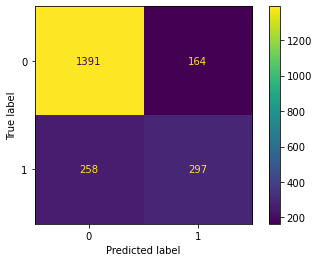

In [45]:
print('Logistic Regression Model')
plot_confusion_matrix(log,X_test,y_test);

Support Vector Machine Model


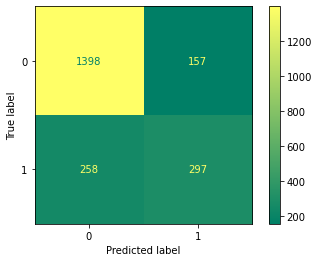

In [46]:
print("Support Vector Machine Model")
plot_confusion_matrix(svm_model,X_test,y_test,cmap='summer');

Random Forest Model


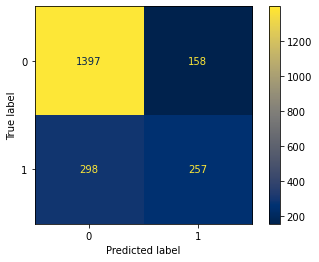

In [47]:
print("Random Forest Model")
plot_confusion_matrix(rand,X_test,y_test,cmap='cividis');

K-Nearest Neighbor Model


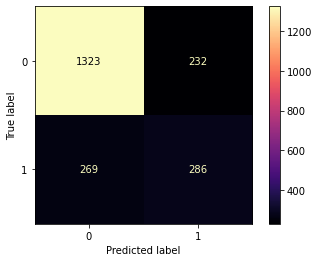

In [48]:
print("K-Nearest Neighbor Model")
plot_confusion_matrix(knn,X_test,y_test,cmap='magma');

Decision Tree Model


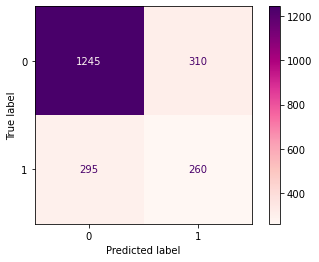

In [49]:
print("Decision Tree Model")
plot_confusion_matrix(dec,X_test,y_test,cmap='RdPu');

Let's predict the probability of churn for each customer using logistic regression model.

In [50]:
# Predict the probability of Churn of each customer
churn_data['Customer Churning Probability'] = log.predict_proba(churn_data[X_test.columns])[:,1]

Here I have created a new column in our dataset named Customer Churning Probability.

In [51]:
churn_data[['customerID','Customer Churning Probability']].head(10)

,customerID,Customer Churning Probability
0,7590-VHVEG,0.637171
1,5575-GNVDE,0.045044
2,3668-QPYBK,0.295285
3,7795-CFOCW,0.032217
4,9237-HQITU,0.690221
5,9305-CDSKC,0.802504
6,1452-KIOVK,0.398117
7,6713-OKOMC,0.284159
8,7892-POOKP,0.635197
9,6388-TABGU,0.008962


Here, we can clearly see the probability of customer whether they churn or not.